# 7 Optical Sources

This notebook forms part of a series on [computational optical radiometry](https://github.com/NelisW/ComputationalRadiometry#computational-optical-radiometry-with-pyradi).  The notebooks can be downloaded from [Github](https://github.com/NelisW/ComputationalRadiometry#computational-optical-radiometry-with-pyradi). These notebooks are constantly revised and updated, please revisit from time to time.  

[<img src="https://zenodo.org/badge/doi/10.5281/zenodo.9910.png"   align="left"/>](http://dx.doi.org/10.5281/zenodo.9910)

The date of this document and module versions used in this document are given at the end of the file.  
Feedback is appreciated: neliswillers at gmail dot com.

## Overview

The pyradi library has a reasonably complete collection of Planck radiator models, both spectral and wide band. A comprehensive collection of physical constants, pertinent to optical radiation is also included.  This notebook introduces these functions in the [`pyradi.ryplanck`](http://nelisw.github.io/pyradi-docs/_build/html/ryplanck.html#pyradi.ryplanck) library.

In [1]:
from IPython.display import display
from IPython.display import Image
from IPython.display import HTML

## Watch out for <font color="red">integer</font> numbers

It seems that Numpy interprets 400 as an integer int32. When this int32 value is raised to the fourth power, the value overflows, resulting in a _negative_ number.  This error can easily happen when entering integer temperature values, raised to a high power.  

In [`ryplanck`](http://nelisw.github.io/pyradi-docs/_build/html/ryplanck.html#module-pyradi.ryplanck), all temperature input values are always converted to float with `.astype(float)` (but only in [`ryplanck`](http://nelisw.github.io/pyradi-docs/_build/html/ryplanck.html#module-pyradi.ryplanck)).

In [2]:
import numpy as np
tt = np.asarray([400, 500])
print(tt.dtype)
print(np.power(tt, 4))

tt = np.asarray([400, 500]).astype(float)
print(tt.dtype)
print(np.power(tt, 4))


int32
[-2147483648 -2147483648]
float64
[  2.56000000e+10   6.25000000e+10]


C:\Anaconda\lib\site-packages\IPython\kernel\__main__.py:4: RuntimeWarning: invalid value encountered in power


## Physical constants

This module uses the CODATA physical constants to derive the constants required for radiation calculations. The constants can be printed as a full set, or these can be accessed individually.  The CODATA constants are part of the SciPy library [`scipy.constants`](http://docs.scipy.org/doc/scipy/reference/constants.html), a comprehensive set of easy-to-access constants.  Where the values are available in `scipy.constants` these are used, if not the values are calculated in the `ryplanck` module.

For more details on CODATA see
<http://physics.nist.gov/cuu/pdf/RevModPhysCODATA2010.pdf>.

In [3]:
import pyradi.ryplanck as ryplanck
print('c (directly from scipy.constants) = {:.14e} m/s\n'.format(ryplanck.const.c))
ryplanck.pconst.printConstants()

c (directly from scipy.constants) = 2.99792458000000e+08 m/s

h = 6.62606957000000e-34 Js
c = 2.99792458000000e+08 m/s
k = 1.38064880000000e-23 J/K
q = 1.60217656500000e-19 C
 
pi = 3.14159265358979e+00
e = 2.71828182845905e+00
zeta(3) = 1.20205690315959e+00
a2 = 1.59362426004004e+00, root of 2(1-exp(-x))-x
a3 = 2.82143937212208e+00, root of 3(1-exp(-x))-x
a4 = 3.92069039487289e+00, root of 4(1-exp(-x))-x
a5 = 4.96511423174429e+00, root of 5(1-exp(-x))-x
 
sigmae = 5.67037300000000e-08 W/(m^2 K^4)
sigmaq = 1.52046059790558e+15 q/(s m^2 K^3)
 
c1em = 3.74177152466413e-16 with wavelenth in m
c1qm = 1.88365156730885e+09 with wavelenth in m
c2m = 1.43877695998382e-02 with wavelenth in m
 
c1el = 3.74177152466413e+08 with wavelenth in $\mu$m
c1ql = 1.88365156730885e+27 with wavelenth in $\mu$m
c2l = 1.43877695998382e+04 with wavelenth in $\mu$m
 
c1en = 3.74177152466413e-08 with wavenumber in cm$^{-1}$
c1qn = 1.88365156730885e+15 with wavenumber in cm$^{-1}$
c2n = 1.43877695998382e+00 with 

## Planck radiation law functions

(Sec. 3.1) The equations describing the Planck radiation law are available with spectral variables for wavelength, wavenumber or frequency. The exitance calculation is available in radiant units (watts) and photon rate units (quanta per second).  The Planck-law temperature derivatives are also available.

All the functions assume wavelength in micrometres ($\mu$m), wavenumber in cm$^{-1}$ and frequency in hertz.  All return values are in area units of m$^2$.  Values returned are expressed in exitance units [e.g., W/(m$^2$)], radiance units [e.g., W/(m$^2$.sr)] can be obtained by dividing the output by `numpy.pi`.

The Planck law functions have the form: [`ryplanck.planck`](http://nelisw.github.io/pyradi-docs/_build/html/ryplanck.html#pyradi.ryplanck.planck) or `planckxx` where two-letter code `xx` denotes the type of spectral variable and return type (see below).

The `ryplanck.planck(spectral, temperature, type='el')` function docstring states as follows:

    Calculates the Planck law spectral exitance from a surface at the stated 
    temperature. Temperature can be a scalar, a list or an array. Exitance can 
    be given in radiant or photon rate units, depending on user input in type.

    Args:
        | spectral (scalar, np.array (N,) or (N,1)):  spectral vector.
        | temperature (scalar, list[M], np.array (M,), (M,1) or (1,M)):  
                    Temperature in [K]
        | type (string):
        |  'e' signifies Radiant values in [W/m^2.*].
        |  'q' signifies photon rate values  [quanta/(s.m^2.*)].
        |  'l' signifies wavelength spectral vector  [micrometer].
        |  'n' signifies wavenumber spectral vector [cm-1].
        |  'f' signifies frequency spectral vecor [Hz].

    Returns:
        | (scalar, np.array[N,M]):  spectral radiant exitance (not radiance) 
                  in units selected.
        | For type = 'el' units will be [W/(m^2.um)].
        | For type = 'qf' units will be [q/(s.m^2.Hz)].
        | Other return types are similarly defined as above.
        | Returns None on error.

    Raises:
        | No exception is raised, returns None on error.


The first function parameter is a spectral vector, typically with shape (N,) or (N,1) but strictly a colum vector [not a row vector shape (1,N)]. 
This spectral domain type must be indicated by the 
appropriate character in the third parameter.

The second parameter is the object temperature  in kelvin.  The temperature values can be a scalar, a list, or a column vector with shape (M,), (M,1), or (1,M), but not of shape shape (Q,M).

The third parameter is a string denoting the calculation required. The first character in the string must be one of 'e' for radiant units or 'q' for photon rate units. The second character in the string must be one of  'l' for wavelength, 'n' for wavenumber, or 'f' for frequency. 

The return value will be in the format as requested in the third parameter:  
- `'el'` will return exitance in units of W/(m$^2$.$\mu$m), calling [`ryplanck.planckel`](http://nelisw.github.io/pyradi-docs/_build/html/ryplanck.html#pyradi.ryplanck.planckel)       
- `'ql'` will return exitance in units of q/(s.m$^2$.$\mu$m), calling [`ryplanck.planckql`](http://nelisw.github.io/pyradi-docs/_build/html/ryplanck.html#pyradi.ryplanck.planckql)    
- `'en'` will return exitance in units of W/(m$^2$.cm$^{-1}$), calling [`ryplanck.plancken`](http://nelisw.github.io/pyradi-docs/_build/html/ryplanck.html#pyradi.ryplanck.plancken)      
- `'qn'` will return exitance in units of q/(s.m$^2$ cm$^{-1}$), calling [`ryplanck.planckqn`](http://nelisw.github.io/pyradi-docs/_build/html/ryplanck.html#pyradi.ryplanck.planckqn)      
- `'ef'` will return exitance in units of W/(m$^2$.Hz), calling [`ryplanck.planckef`](http://nelisw.github.io/pyradi-docs/_build/html/ryplanck.html#pyradi.ryplanck.planckef)        
- `'qf'` will return exitance in units of q/(s.m$^2$.Hz), calling [`ryplanck.planckqf`](http://nelisw.github.io/pyradi-docs/_build/html/ryplanck.html#pyradi.ryplanck.planckqf)       

The `ryplanck.planckxx(spectral, temperature)` forms have only two parameters: spectral and temperature.

In addition to to the series of `planckxx` funtions there are a similar series of `dplnckxx` series  and [`ryplanck.dplanck`](http://nelisw.github.io/pyradi-docs/_build/html/ryplanck.html#pyradi.ryplanck.dplanck) to calculate the temperature derivative of the Planck law. These functions have the same function parameters as for `planckxx`.  The return values are similar, except that these have an additional unit (1/K).

The [`ryplanck.planck`](http://nelisw.github.io/pyradi-docs/_build/html/ryplanck.html#pyradi.ryplanck.planck) and [`ryplanck.dplanck`](http://nelisw.github.io/pyradi-docs/_build/html/ryplanck.html#pyradi.ryplanck.dplanck) functions can take different data types for the spectral and temperature parameters.

Either or both `spectral` and `temperature` can be scalar, in which case the return type is a scalar.

In [4]:
import pyradi.ryplanck as ryplanck
print(ryplanck.planck(10, 1000, 'el').shape)

()






If `spectral` is a numpy array, it must have shape (N,) or (N,1).  Row vectors of shape (1,N) is not allowed

In [5]:
wl = np.linspace(1, 15, 101).reshape(-1,)
print(ryplanck.planck(wl, 1000., 'el').shape)
wl = np.linspace(1, 15, 101).reshape(-1,1)
print(ryplanck.planck(wl, 1000., 'el').shape)
# Error! shape (1,N) not allowed
# wl = np.linspace(1, 15, 101).reshape(1,-1,) 
# print(ryplanck.planck(wl, 1000, 'el').shape)

(101,)
(101,)


Temperature can be a scalar, a list, or any form of vector with shape (M,), (M,1), or (1,M), but not of shape (Q,M).

In [6]:
wl = np.linspace(1, 15, 101).reshape(-1,)
print(ryplanck.planck(wl, 200., 'el').shape)
print(ryplanck.planck(wl, [200.,400.], 'el').shape)
print(ryplanck.planck(wl, np.asarray([200.,400.,500.]).reshape(-1,), 'el').shape)
print(ryplanck.planck(wl, np.asarray([200.,400.]).reshape(-1,1), 'el').shape)
print(ryplanck.planck(wl, np.asarray([200.,400.]).reshape(1,-1), 'el').shape)
# Error! shape (Q,M) not allowed
# print(ryplanck.planck(wl, 1000 * np.ones((2,2)), 'el').shape) 

print(ryplanck.planck(5, [200.,400.], 'el').shape)

(101,)
(101, 2)
(101, 3)
(101, 2)
(101, 2)
(1, 2)


The return value of the [`ryplanck.planck`](http://nelisw.github.io/pyradi-docs/_build/html/ryplanck.html#pyradi.ryplanck.planck) and [`ryplanck.dplanck`](http://nelisw.github.io/pyradi-docs/_build/html/ryplanck.html#pyradi.ryplanck.dplanck) functions always have the spectral domain along the row direction (axis=0) and temperature domain along the column direction (axis=1).

The example above also shows how the [`ryplanck.planck`](http://nelisw.github.io/pyradi-docs/_build/html/ryplanck.html#pyradi.ryplanck.planck) and [`ryplanck.dplanck`](http://nelisw.github.io/pyradi-docs/_build/html/ryplanck.html#pyradi.ryplanck.dplanck) functions can be invoked  with multiple temperature values, allowing compact code and fast vectorised calculations.

## Stefan-Boltzman wideband exitance

The Stefan-Boltzman equation is available as [`ryplanck.stefanboltzman`](http://nelisw.github.io/pyradi-docs/_build/html/ryplanck.html#pyradi.ryplanck.stefanboltzman)  

    Calculates the total Planck law exitance, integrated over all wavelengths,
    from a surface at the stated temperature. Exitance can be given in radiant or
    photon rate units, depending on user input in type.

    Args:
        | temperature (float):  temperature scalar in [K].
        | type (string):  'e' for radiant or 'q' for photon rate exitance.

    Returns:
        | (float): integrated radiant exitance in  [W/m^2] or [q/(s.m^2)].
        | Returns a -1 if the type is not 'e' or 'q'

    Raises:
        | No exception is raised.


In [7]:
# %load_ext autoreload
# %autoreload 2
%matplotlib inline
import pyradi.ryplanck as ryplanck

temperature = 1000. # K
print('T={} Stefan-Boltzman={} W/m^2'.format(temperature, ryplanck.stefanboltzman(temperature,'e')))
print('T={} Stefan-Boltzman={} q/(s.m^2)'.format(temperature, ryplanck.stefanboltzman(temperature,'q')))

temperature = [1000, 2000] # K
print('T={} Stefan-Boltzman={} W/m^2'.format(temperature, ryplanck.stefanboltzman(temperature,'e')))
print('T={} Stefan-Boltzman={} q/(s.m^2)'.format(temperature, ryplanck.stefanboltzman(temperature,'q')))

temperature = np.asarray([1000, 2000])   # K
print('T={} Stefan-Boltzman={} W/m^2'.format(temperature, ryplanck.stefanboltzman(temperature,'e')))
print('T={} Stefan-Boltzman={} q/(s.m^2)'.format(temperature, ryplanck.stefanboltzman(temperature,'q')))

# Error! temperature is of shape (Q,M) returns value of -1
print('T={} Stefan-Boltzman={} q/(s.m^2)'.format(temperature, ryplanck.stefanboltzman(np.ones((2,2)),'e')))

T=1000.0 Stefan-Boltzman=56703.73 W/m^2
T=1000.0 Stefan-Boltzman=1.52046059791e+24 q/(s.m^2)
T=[1000, 2000] Stefan-Boltzman=[  56703.73  907259.68] W/m^2
T=[1000, 2000] Stefan-Boltzman=[  1.52046060e+24   1.21636848e+25] q/(s.m^2)
T=[1000 2000] Stefan-Boltzman=[  56703.73  907259.68] W/m^2
T=[1000 2000] Stefan-Boltzman=[  1.52046060e+24   1.21636848e+25] q/(s.m^2)
ryplanck.stefanboltzman: temperature must be of shape (M,), (M,1) or (1,M)
T=[1000 2000] Stefan-Boltzman=-1 q/(s.m^2)


# Wien law

The Wien law is so simple that only the constants are provided.  The constants are as follows:

    ryplanck.pconst.wel  um.K     radiant and wavelength
    ryplanck.pconst.wql  um.K     photon rate and wavelength
    ryplanck.pconst.wen  cm-1/K   radiant and wavenumber
    ryplanck.pconst.wqn  cm-1/K   photon rate and wavenumber
    ryplanck.pconst.wef  Hz/K     radiant and frequency
    ryplanck.pconst.wqf  Hz/K     photon rate and frequency



In [8]:
print('Wien constant for radiant power and wavelength = {}'.format(ryplanck.pconst.wel))
print('Peak wavelength for object at {} K is {} um'.format(2850, ryplanck.pconst.wel/2850))


Wien constant for radiant power and wavelength = 2897.7721213
Peak wavelength for object at 2850 K is 1.01676214783 um


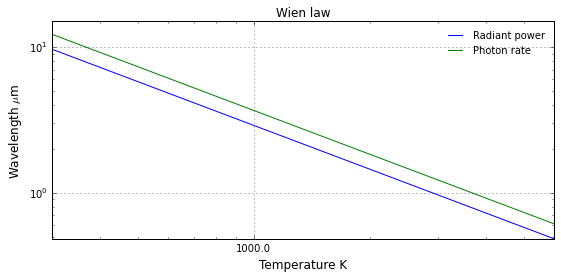

In [9]:
import pyradi.ryplot as ryplot
temperature = np.linspace(300, 6000, 101).astype(float)
wlwienel = ryplanck.pconst.wel / temperature
wlwienql = ryplanck.pconst.wql / temperature
lp = ryplot.Plotter(1,figsize=(9,4))
lp.logLog(1,temperature,wlwienel,label=['Radiant power'])
lp.logLog(1,temperature,wlwienql,"Wien law","Temperature K","Wavelength $\mu$m",
          label=['Photon rate'], drawGrid=True,
          pltaxis=[np.min(temperature), np.max(temperature), 0 ,15])


## Planck law graphs

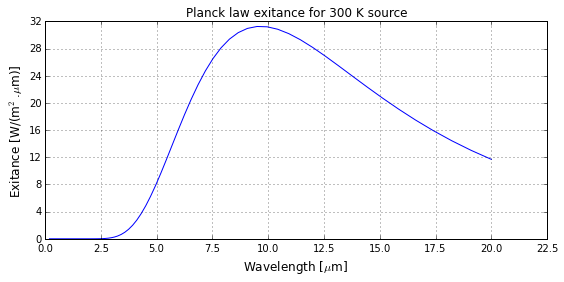

In [10]:
import pyradi.ryplot as ryplot
#plot a single planck curve on linear scale for 300K source
wl = np.logspace(np.log10(0.2), np.log10(20), num=100).reshape(-1, 1)
Mel = ryplanck.planck(wl, 300, type='el') # [W/(m$^2$.$\mu$m)]
lp = ryplot.Plotter(1,figsize=(9,4))
lp.plot(1,wl,Mel,"Planck law exitance for 300 K source","Wavelength [$\mu$m]",
            "Exitance [W/(m$^2$.$\mu$m)]");

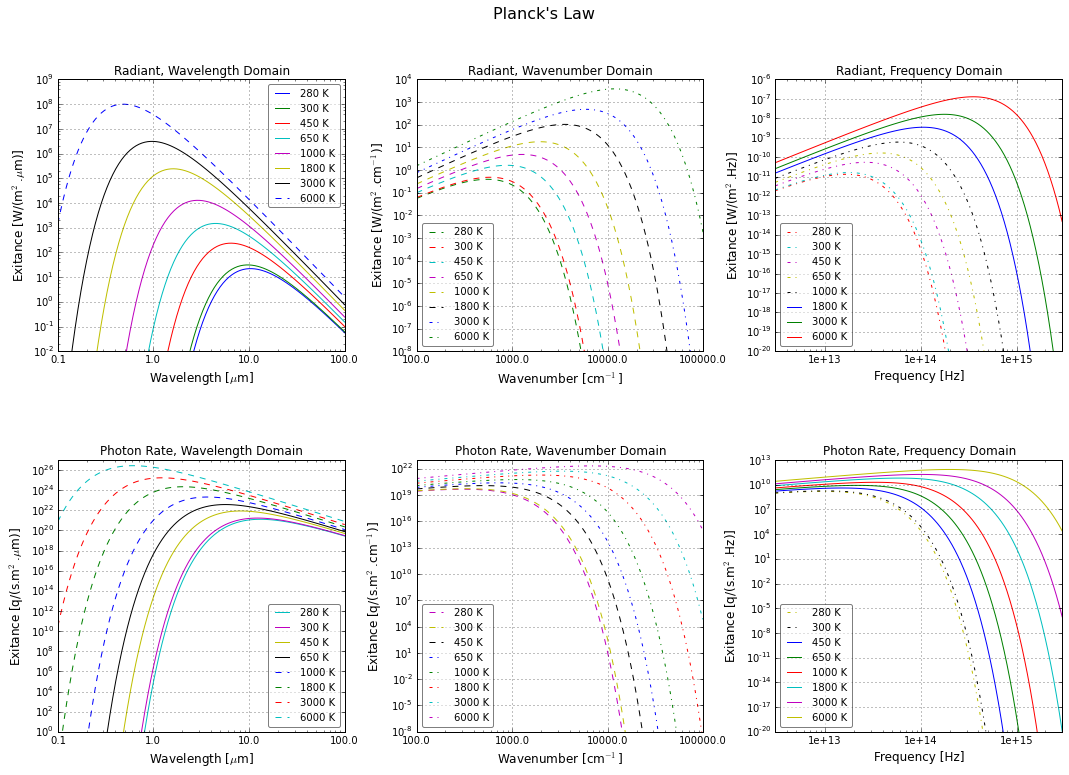

In [11]:
#plot all the planck functions.
wl = np.logspace(np.log10(0.1), np.log10(100), num=100).reshape(-1, 1)
n = np.logspace(np.log10(1e4/100),np.log10(1e4/0.1), num=100).reshape(-1, 1)
f = np.logspace(np.log10(ryplanck.const.c/ (100*1e-6)),np.log10(ryplanck.const.c/ (0.1*1e-6)), num=100).reshape(-1, 1)
temperature = [280, 300, 450, 650, 1000, 1800, 3000, 6000]

Mel = ryplanck.planck(wl, np.asarray(temperature).reshape(-1,1), type='el') # [W/(m$^2$.$\mu$m)]
Mql = ryplanck.planck(wl, np.asarray(temperature).reshape(-1,1), type='ql') # [q/(s.m$^2$.$\mu$m)]
Men = ryplanck.planck(n,  np.asarray(temperature).reshape(-1,1), type='en') # [W/(m$^2$.cm$^{-1}$)]
Mqn = ryplanck.planck(n,  np.asarray(temperature).reshape(-1,1), type='qn') # [q/(s.m$^2$.cm$^{-1}$)]
Mef = ryplanck.planck(f,  np.asarray(temperature).reshape(-1,1), type='ef') # [W/(m$^2$.Hz)]
Mqf = ryplanck.planck(f,  np.asarray(temperature).reshape(-1,1), type='qf') # [q/(s.m$^2$.Hz)]

legend = ["{0:.0f} K".format(temperature[0])]
for temp in temperature[1:] :
    legend.append("{0:.0f} K".format(temp))

fplanck = ryplot.Plotter(1, 2, 3,"Planck's Law", figsize=(18, 12))
fplanck.logLog(1, wl, Mel, "Radiant, Wavelength Domain","Wavelength [$\mu$m]", 
    "Exitance [W/(m$^2$.$\mu$m)]",legendAlpha=0.5, label=legend, drawGrid=True,
                pltaxis=[0.1, 100, 1e-2, 1e9])
fplanck.logLog(2, n, Men, "Radiant, Wavenumber Domain","Wavenumber [cm$^{-1}$]",
    "Exitance [W/(m$^2$.cm$^{-1}$)]",legendAlpha=0.5, label=legend, drawGrid=True,
                pltaxis=[100, 100000, 1e-8, 1e+4])
fplanck.logLog(3, f, Mef, "Radiant, Frequency Domain","Frequency [Hz]",
    "Exitance [W/(m$^2$.Hz)]",legendAlpha=0.5, label=legend, drawGrid=True,
                pltaxis=[3e12, 3e15, 1e-20, 1e-6])

fplanck.logLog(4, wl, Mql, "Photon Rate, Wavelength Domain","Wavelength [$\mu$m]",
    "Exitance [q/(s.m$^2$.$\mu$m)]",legendAlpha=0.5, label=legend, drawGrid=True,
                pltaxis=[0.1, 100, 1e-0, 1e27])
fplanck.logLog(5, n, Mqn, "Photon Rate, Wavenumber Domain","Wavenumber [cm$^{-1}$]",
    "Exitance [q/(s.m$^2$.cm$^{-1}$)]",legendAlpha=0.5, label=legend, drawGrid=True,
                pltaxis=[100, 100000, 1e-8, 1e+23])
fplanck.logLog(6, f, Mqf, "Photon Rate, Frequency Domain","Frequency [Hz]",
    "Exitance [q/(s.m$^2$.Hz)]",legendAlpha=0.5, label=legend, drawGrid=True,
                pltaxis=[3e12, 3e15, 1e-20, 1e+13])


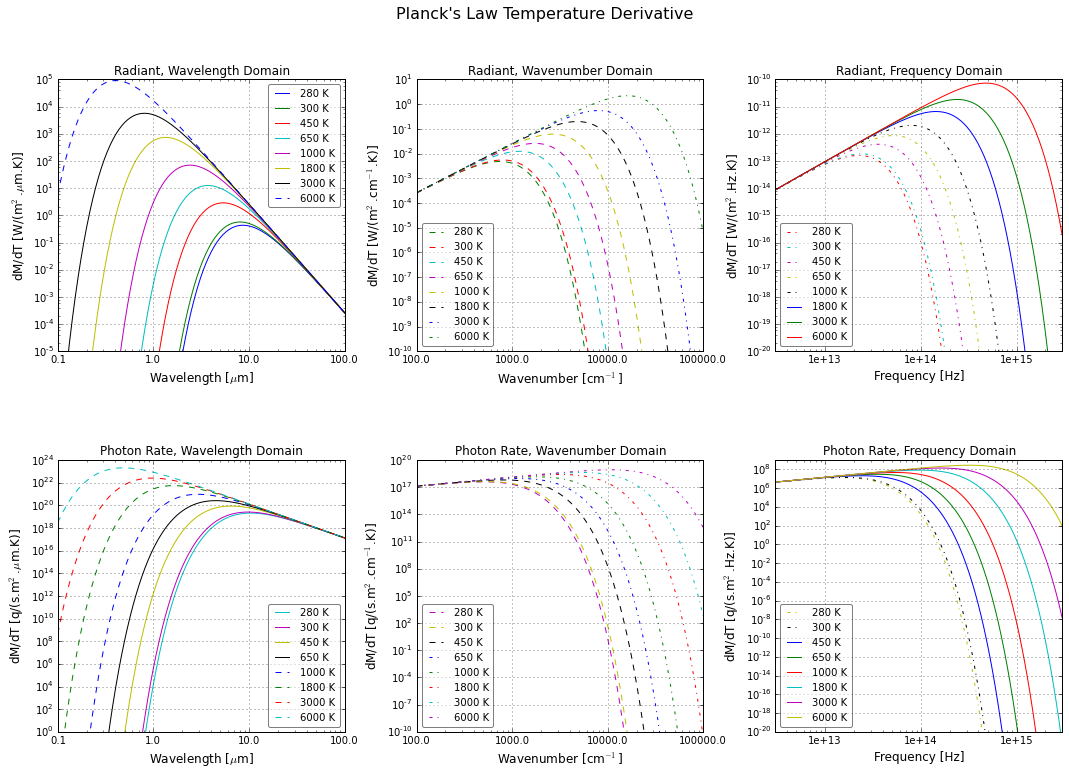

In [12]:
#now plot temperature derivatives
Mel = ryplanck.dplanck(wl, np.asarray(temperature).reshape(-1,1), type='el') # [W/(m$^2$.$\mu$m.K)]
Mql = ryplanck.dplanck(wl, np.asarray(temperature).reshape(-1,1), type='ql') # [q/(s.m$^2$.$\mu$m.K)]
Men = ryplanck.dplanck(n , np.asarray(temperature).reshape(-1,1), type='en') # [W/(m$^2$.cm$^{-1}$.K)]
Mqn = ryplanck.dplanck(n,  np.asarray(temperature).reshape(-1,1), type='qn') # [q/(s.m$^2$.cm$^{-1}$.K)]
Mef = ryplanck.dplanck(f,  np.asarray(temperature).reshape(-1,1), type='ef') # [W/(m$^2$.Hz.K)]
Mqf = ryplanck.dplanck(f,  np.asarray(temperature).reshape(-1,1), type='qf') # [q/(s.m$^2$.Hz.K)]

fdplanck = ryplot.Plotter(2, 2, 3,"Planck's Law Temperature Derivative", figsize=(18, 12))
fdplanck.logLog(1, wl, Mel, "Radiant, Wavelength Domain","Wavelength [$\mu$m]", 
    "dM/dT [W/(m$^2$.$\mu$m.K)]",legendAlpha=0.5, label=legend, drawGrid=True, 
                pltaxis=[0.1, 100, 1e-5, 1e5])
fdplanck.logLog(2, n, Men, "Radiant, Wavenumber Domain","Wavenumber [cm$^{-1}$]", 
    "dM/dT [W/(m$^2$.cm$^{-1}$.K)]",legendAlpha=0.5, label=legend, drawGrid=True, 
                pltaxis=[100, 100000, 1e-10, 1e+1])
fdplanck.logLog(3, f, Mef, "Radiant, Frequency Domain","Frequency [Hz]", 
    "dM/dT [W/(m$^2$.Hz.K)]",legendAlpha=0.5, label=legend, drawGrid=True, 
                pltaxis=[3e12, 3e15, 1e-20, 1e-10])

fdplanck.logLog(4, wl, Mql, "Photon Rate, Wavelength Domain","Wavelength [$\mu$m]", 
    "dM/dT [q/(s.m$^2$.$\mu$m.K)]",legendAlpha=0.5, label=legend, drawGrid=True, 
                pltaxis=[0.1, 100, 1e-0, 1e24])
fdplanck.logLog(5, n, Mqn, "Photon Rate, Wavenumber Domain","Wavenumber [cm$^{-1}$]", 
    "dM/dT [q/(s.m$^2$.cm$^{-1}$.K)]",legendAlpha=0.5, label=legend, drawGrid=True, 
                pltaxis=[100, 100000, 1e-10, 1e+20])
fdplanck.logLog(6, f, Mqf, "Photon Rate, Frequency Domain","Frequency [Hz]", 
    "dM/dT [q/(s.m$^2$.Hz.K)]",legendAlpha=0.5, label=legend, drawGrid=True, 
                pltaxis=[3e12, 3e15, 1e-20, 1e+9])


## Example applications

### The number of bits required to express colour ratio

Calculate the number of bits required in an image to express the colour ratio between an MTV flare and a relatively cold aircraft fuselage.  It is assumed here that the flare and fuselage are resolved, i.e., the individual image pixels are completely filled by the flare and fuselage respectively.  First calculate the radiance ratio of aircraft fuselage to MTV flare in 3-5 um band.  The flare is modelled as a blackbody with temperature 2200 K and emissivity of 0.15.  The aircraft has a temperature of 250 K and an emissivity of 1.  The number of bits required is given by $\log_2(L_{\rm flare}/L_{\rm aircraft})$

In [13]:
wl = np.linspace(3.5, 5, 201)
flareEmis = 0.15
flareTemp = 2200
flareM = flareEmis * np.trapz(ryplanck.planckel(wl,flareTemp).reshape(-1, 1),wl, axis=0)[0]
#aircraft fuselage temperature is 250 K. emissivity=1,
aircraftEmis = 1.0
aircraftTemp = 250
aircraftM =  aircraftEmis *np.trapz(ryplanck.planckel(wl,aircraftTemp).reshape(-1, 1),wl, axis=0)[0]
print('Mflare    = {0:.2f} W/m2'.format(flareM))
print('Maircraft = {0:.1f} W/m2'.format(aircraftM))
print('Colour ratio: ratio={0:.3e} minimum number of bits required={1:.1f}'.\
    format(flareM/aircraftM,  np.log2(flareM/aircraftM)))

Mflare    = 17583.36 W/m2
Maircraft = 0.7 W/m2
Colour ratio: ratio=2.625e+04 minimum number of bits required=14.7


### Cumulative blackbody curves

The following code produces (Fig 3.4) in the book. The top figure shows the spectral radiance of a few real-world objects. The bottom graph shows the normalised cumulative radiance of the same objects. The bottom graph is useful to estimate the percentage of total radiance above/below a wavelength.  From this curve it is evident that a tungsten lamp radiates less than 10% of its total flux in the visual spectral band. From this graph it can be concluded that approximately 40% of the sun's output is in the visual spectral band.

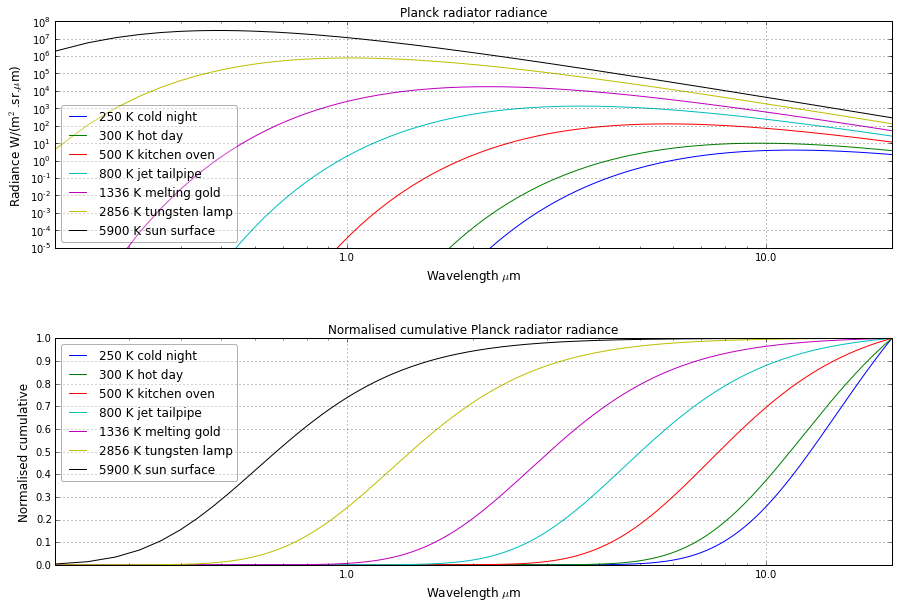

In [14]:
wl = np.linspace(0.2, 20, 501)
tmpr = [250, 300, 500, 800, 1336, 2856, 5900]
strL = ['cold night', 'hot day', 'kitchen oven', 'jet tailpipe', 'melting gold', 
        'tungsten lamp', 'sun surface']
L = ryplanck.planckel(wl,tmpr) / np.pi
Lcum = np.cumsum(L, axis=0)
Lcum = Lcum / np.max(Lcum, axis=0)

fc = ryplot.Plotter(1, 2, 1, figsize=(15, 10))
legend = ['{} K {}'.format(item[0], item[1]) for item in zip(tmpr,strL)]
fc.logLog(1, wl, L, "Planck radiator radiance","Wavelength $\mu$m", 
    "Radiance W/(m$^2$.sr.$\mu$m)",legendAlpha=0.3, label=legend, drawGrid=True, 
                pltaxis=[0.2, 20, 1e-5, 1e8], labelfsize=12)
fc.resetPlotCol()
fc.semilogX(2, wl, Lcum, "Normalised cumulative Planck radiator radiance","Wavelength $\mu$m", 
    "Normalised cumulative",legendAlpha=0.3, label=legend, drawGrid=True, 
                pltaxis=[0.2, 20, 0, 1], labelfsize=12)

### Reflected sunlight radiance

(Sec 3.7) derives an equation for the reflected sunlight radiance of a surface:
$$
L_\lambda=
\frac{
\epsilon_{\rm s}L_{{\rm bb}\lambda}(T_{ \rm s})
A_{\rm s}\tau_s\rho_d\cos\theta_i}{\pi R_{\rm sun}^2}
=
\psi  \epsilon_{\rm s}L_{{\rm bb}\lambda}(T_{ \rm s})\tau_s
\rho_d\cos\theta_i,
$$
where 
where $\epsilon_{\rm s}\approx 1$ is the emissivity of the sun's surface,
$T_s$ is the sun's surface temperature,
$\tau_s$ is the atmospheric transmittance between the sun and the surface, and $\theta_i$ is the angle between the surface normal and the sun vector.  The reflected sun radiance from a perfectly Lambertian surface is then given by $L_\lambda=\rho_d E_{\lambda \rm sun}/\pi$, where $\rho_d$ is the surface diffuse reflectance function. The constant $\psi  =A_{\rm sun}/(\pi R_{\rm sun}^2) =2.1757\times10^{-5}$ [sr/sr] follows from the geometry.

This really simple model does not account for sky radiance or light incident on the surface from other sources, applicable only to situations where the surface is directly illuminated by the sun, and with a object surface normal angle within 70 degrees or so from the sun direction. At larger angles the sun illumination decreases rapidly and other sources such terrain or sky radiance contribute increasingly more.

This section compares the simple model presented above with the  results obtained using a Modtran-calculated solar irradiance.

First to the imports and general preparation.

In [15]:
import pyradi.ryfiles as ryfiles
import pyradi.rymodtran as rymodtran
import pyradi.ryutils as ryutils

Modtran5 was used to calculate the solar irradiance and transmittance to space for a slant path. Modtran was used in direct solar irradiance mode, with Tropical profile with 23 km Rural visibility. The solar irradiance and transmittance to space is calculated at sea level, for a 45 degree zenith angle, on day 1.  The data files are available on the pyradi website.  Download, extract and plot the data.

In [16]:
tgzFilename = 'tropical-23krural-45deg-space.tgz'
destinationDir = '.'
tarFilename = 'tropical-23krural-45deg-space.tar'
url = 'https://raw.githubusercontent.com/NelisW/pyradi/master/pyradi/data/'
dlNames = ryfiles.downloadUntar(tgzFilename, url, destinationDir, tarFilename)

print('filesAvailable is {}'.format(dlNames))

filesAvailable is ['tropical-23krural-45deg-space.fl7', 'tropical-23krural-45deg-space.ltn']


The Modtran tape7 file contents is as follows (the first few lines):

    T F 1    3    3    0    1    1    1    1    1    1    1    0    0   0.000   0.00
        1    1    1    0    0    0  23.00000   0.00000   0.00000   0.00000   0.00000
     -99.000 -99.000 -99.000
     -99.00000 -99.00000 -99.00000  4.114728  0.000594 ! H2O & O3 COLUMNS [GM/CM2]
       36TROPICAL MODEL      
       0.00000 100.00000  45.00000 140.37962   0.87815   0.00000    0        0.00000
      -99  -99    1    0
     -99.00000 -99.00000 -99.00000 -99.00000 -99.00000 -99.00000   0.00000 -99.00000
       12495.0   33340.0       1.0       1.0NW        W1    
        0   0    0.000  0    0.000  0    1.000
        FREQ   TRANS     SOL TR  SOLAR
    12495.00  0.6706 5.03E-06 7.50E-06                                                              3.995E-01
    12496.00  0.4790 3.47E-06 7.23E-06                                                              7.360E-01
    12497.00  0.7075 5.07E-06 7.16E-06                                                              3.460E-01
    12498.00  0.6852 4.90E-06 7.15E-06                                                              3.780E-01
    12499.00  0.5352 3.84E-06 7.17E-06                                                              6.252E-01
    ...

Extract the data from the file using [`rymodtran.loadtape7`](http://nelisw.github.io/pyradi-docs/_build/html/rymodtran.html#pyradi.rymodtran.loadtape7). Then convert the spectral irradiance from W/(cm$^2$.cm$^{-1}$) to W/(m$^2$.$\mu$m) and plot the result.


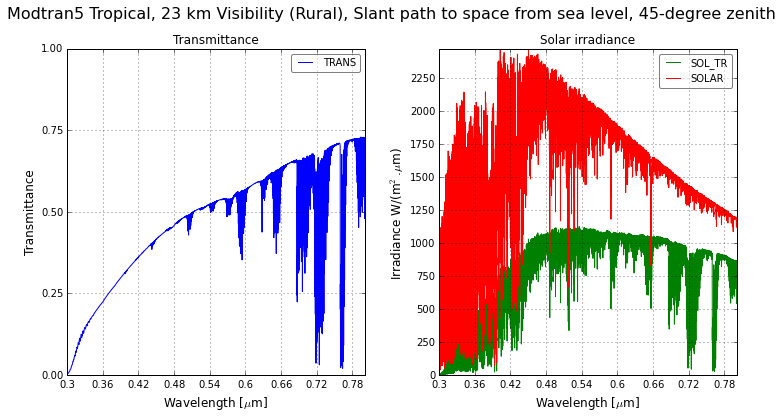

In [17]:
colSelect =  ['FREQ', 'TRANS', 'SOL_TR', 'SOLAR']
tape7= rymodtran.loadtape7("tropical-23krural-45deg-space.fl7", colSelect )
tSun = tape7[:,1]
wl, eSun = ryutils.convertSpectralDensity(tape7[:,0], tape7[:,2:4], type='nl')
eSun *= 1e4 # convert from cm^2 to m^2

mT = ryplot.Plotter(1, 1, 2,"Modtran5 Tropical, 23 km Visibility (Rural)"\
                   + ", Slant path to space from sea level, 45-degree zenith",figsize=(12,6))
mT.plot(1, wl, tSun, "Transmittance","Wavelength [$\mu$m]", "Transmittance",
       label=colSelect[1:],legendAlpha=0.5, pltaxis=[np.min(wl),np.max(wl), 0, 1],
       maxNX=10, maxNY=4);
mT.plot(2, wl, eSun, "Solar irradiance","Wavelength [$\mu$m]", "Irradiance W/(m$^2$.$\mu$m) ",
       label=colSelect[2:],legendAlpha=0.5, pltaxis=[np.min(wl),np.max(wl), 0, np.max(eSun)],
       maxNX=10, maxNY=10);

Consider an object with reflectance of one, with normal vector pointed towards the sun.

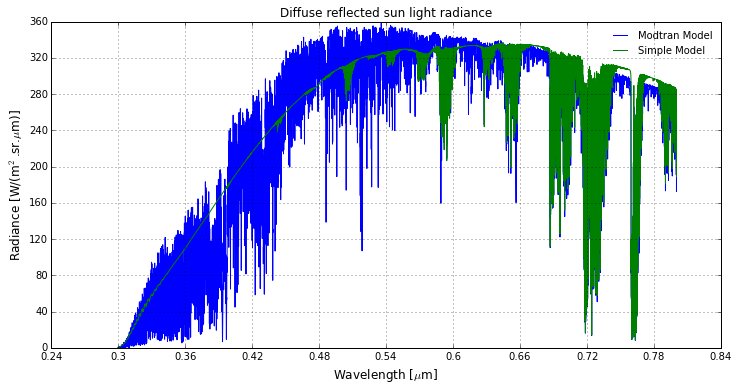

In [18]:
rho = 1  #perfectly white surface
theta = 0 # surface oriented towards the sun

Lsimp = 2.1757e-5 * (ryplanck.planckel(wl, 5900.) / np.pi) * tSun * rho * np.cos(theta)
Lmodt =  rho * np.cos(theta) * eSun[:,0] / np.pi

lp = ryplot.Plotter(1,1,1,figsize=(12,6))
lp.plot(1,wl,Lmodt,"Diffuse reflected sun light radiance","Wavelength [$\mu$m]",
            "Radiance [W/(m$^2$.sr.$\mu$m)]",label=['Modtran Model']);
lp.plot(1,wl,Lsimp,label=['Simple Model']);

It appears that the simple model fits the Modtran data reasonably closely.  The shape of the two radiance curves are somewhat different.  Considering the simplicity of the model the results are quite acceptable.

(Sec 2.10.3) Next calculate the luminance of the object's surface.  The photopic luminance of a source is defined as
$$
L_\nu=\int_0^\infty K_{\rm max} V_\lambda L_{e\lambda} d \lambda,
$$
where
$K_\lambda=K_{\rm max}V_\lambda$ is the spectral photopic efficacy,
$V_\lambda$ is the photopic efficiency,
$K_{\rm max}=683$ lm/W is the maximum value of photopic
efficacy, referenced to a 2042-K blackbody standard source, and
$L_{e\lambda}$ is the source's  radiance.  The spectral shape of photopic luminous efficiency is can be _roughly  approximated_ by 
$$
V_\lambda=1.019\exp(-285.51(\lambda - 0.5591)^2).
$$
There are data tables from the CIE standards that describe this shape more accurately but this approximation is sufficient for the present requirement.

Surface luminance is 23440 lm/(m2.sr)


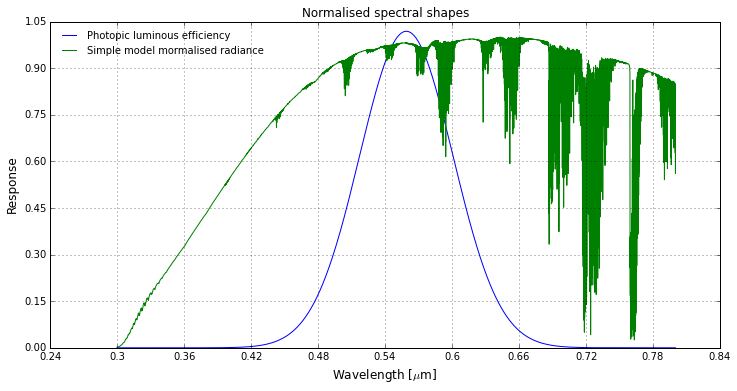

In [19]:
photLumEff = 1.019 * np.exp(-285.51 * (wl - 0.5591) ** 2 ).reshape(-1,)
#correct for sign because wl is decreasing (it was created from wavenumbers)
luminance =  - np.trapz(683. * photLumEff * Lsimp,wl, axis=0)

print('Surface luminance is {:.0f} lm/(m2.sr)'.format(luminance))
p = ryplot.Plotter(1,1,1,figsize=(12,6))
p.plot(1,wl,photLumEff , "Normalised spectral shapes","Wavelength [$\mu$m]",
            "Response", label=['Photopic luminous efficiency']);
p.plot(1,wl,Lsimp/np.max(Lsimp),label=['Simple model mormalised radiance']);

According to [Wikipedia](https://en.wikipedia.org/wiki/Luminance) the sun has a (apparent?) luminance of 1.6e9 cd/m2 at noon, which, if converted with $\psi$=2.1757e-5 gives a value of 34811 lm/(m$^2$.sr). Comparing this to the value of 23440 lm/(m$^2$.sr) calculated above, yields a ratio of 1.48. Considering the fact that the Wikipedia atmosphere is not known and that the simple calculation is for a slant path of 45 degrees, the result from the simple model seems feasible.

## Implementation detail

The implementation of the Planck functions in Python/Numpy is explained in more detail here. This information is not required to use the functions, but may be useful to Python code developers.

The Planck equations have a form similar to this:
$$
M_{e\lambda}(T)
=\frac{2\pi h c^2}{\lambda^5 \left(e^{hc/(\lambda kT)}-1\right)} 
=\frac{c_{1e\lambda}}{\lambda^5 \left(e^{c_{2\lambda}/(\lambda T)}-1\right)}
$$

One of the computational issues is that for combinations of short wavelength (high frequency) and low temperature, the value in the exponent becomes very big and the calculation produces NaN or Inf results (values should be near zero or zero).  This follows from the range of values that the IEEE floating point format can handle (hence all languages have this problem).
This fault condition is tested for and corrected if it does occur (the function correctly returns zeros for those values):

    #np.exp() has upper limit in IEEE double range, catch this in Planck calcs
    explimit = 709.7

    #test value of exponent to prevent infinity, force to exponent to zero
    #this happens for low temperatures and short wavelengths
    exP =  pconst.c2l / (spectral * temperature)
    exP2 = numpy.where(exP<explimit, exP, 1);
    p = (pconst.c1el / ( numpy.exp(exP2)-1)) / (spectral ** 5)
    #if exponent is exP>=explimit, force Planck to zero
    planckA = numpy.where(exP<explimit, p, 0);

In pyradi we try to use vectorised calculations where possible - this means not to use loops where it can be avoided.  The objective with this approach is that it is more compact, easier to read and less prone to errors in coding (especially when doing copy-paste operations).    The Planck function interface supports a vectorised operations (as detailed above). 

The Planck equation does not lend itself to vectorised calculation because of its relative complex form.
Attempting to write the Planck equation in vector/matrix form will be quite a challenge. In ryplanck, the spectral variable and temperature variable are accepted in array form, but then 'flattened' into long vectors of matching values of spectral sample and temperature sample - for which the Planck equation can be readily calculated.  After the Planck calculation is complete, the flat array is reshaped back, according to the shape of the input arrays.

In a non-vector calculation the Planck equation will require two loops: one for spectral variation and one for the temperature variation.  The flatten operation essentially creates combinations of all the input values: each spectral value is paired with each temperature value. The flattened array represents the pairs of values that would be formed by the two nested loops, but instead of looping over time, the flattened array spreads across space (trading looping time for memory).   The flattening process is performed such that the spectral/temperature variable structure remains such that it can be reshaped back into the original format.  Note that flattening and reshaping has almost no computing overhead, it does not make or change variables, it only changes the _view_ on the data.

There are twelve variations of the Planck equation and its temperature derivative.  It was an arduous task to include exactly the same flattening and reshaping code in all twelve functions - and then changing them all when a change was required.  Instead there is now only one implementation of the flattening and reshaping code, and it applies to all twelve functions.  The code is implemented in a Python [decorator](http://www.artima.com/weblogs/viewpost.jsp?thread=240808) (not unique to Python, many other languages also have decorators).  The decorator is almost like a wrapping function that is applied to the user function (decorating the original). Using the decorator function it is possible to execute code before the user function is called and then also after the user function is called.  In this application, the flattening is done before the function call and the reshaping is done after the function call - keeping only one copy of the code, but applying it to all the functions.  Python decorators are also used for many other [applications](https://wiki.python.org/moin/PythonDecoratorLibrary).

The code is as follows. First the user function showing the decorator, indicated here as `@fixDimensions`. Note that the user function (docstring removed) focuses only on the Planck equation and not on array dimensions. The `fixDimensions` intercepts all the input and output from this function and process according to the decorator requirements.

    @fixDimensions
    def planckel(spectral, temperature):
   
        #test value of exponent to prevent infinity, force to exponent to zero
        #this happens for low temperatures and short wavelengths
        exP =  pconst.c2l / (spectral * temperature)
        exP2 = numpy.where(exP<explimit, exP, 1);
        p = (pconst.c1el / ( numpy.exp(exP2)-1)) / (spectral ** 5)
        #if exponent is exP>=explimit, force Planck to zero
        planckA = numpy.where(exP<explimit, p, 0);
    
        return planckA

The decorator function (docstring removed) focuses only on manipulation of input and output data formats, and has no idea what is happening inside the Planck functions, which it calls.  

The decorator function:

- checks the shapes of the input variables and takes error action if necessary.
- converts all input to numpy arrays, interpreted as float values (if not already so)
- reshapes and creates a meshgrid to provide all the combinations of input sample values.
- flattens the arrays by using the [ravel](http://docs.scipy.org/doc/numpy/reference/generated/numpy.ravel.html) function.  

<p/>
  

    def fixDimensions(planckFun):
      @wraps(planckFun)
      def inner(spectral, temperature):
    
        #confirm that only vector is used, break with warning if so.
        if isinstance(temperature, numpy.ndarray):
            if len(temperature.flat) != max(temperature.shape):
                print('ryplanck: temperature must be of shape (M,), (M,1) or (1,M)')
                return None
        #confirm that no row vector is used, break with warning if so.
        if isinstance(spectral, numpy.ndarray):
            if len(spectral.flat) != spectral.shape[0]:
                print('ryplanck: spectral must be of shape (N,) or (N,1)')
                return None
        tempIn = numpy.array(temperature, copy=True,  ndmin=1).astype(float)
        specIn = numpy.array(spectral, copy=True,  ndmin=1).astype(float)
        tempIn = tempIn.reshape(-1,1)
        specIn = specIn.reshape(-1,1)
    
        #create flattened version of the input dataset
        specgrid, tempgrid = numpy.meshgrid(specIn,tempIn)
        spec = numpy.ravel(specgrid)
        temp = numpy.ravel(tempgrid)
    
At this point the Planck function is called with the flattened arrays. 

        #this is the actual planck calculation
        planckA = planckFun(spec,temp) 
        
After the function returns, the return values are handed back to the decorator function which then proceeds to reshape the array back into a format the user can work with.
    
        #now unflatten to proper structure again, spectral along axis=0
        if tempIn.shape[0] == 1 and specIn.shape[0] == 1:
            rtnVal = planckA[0]
        elif tempIn.shape[0] == 1 and specIn.shape[0] != 1:
            rtnVal = planckA.reshape(specIn.shape[0],)
        elif tempIn.shape[0] != 1 and specIn.shape[0] == 1:
            rtnVal = planckA.reshape(specIn.shape[0],-1)
        else:
            rtnVal = planckA.reshape(tempIn.shape[0],-1).T
    
        return rtnVal
      return inner

## Python and [module versions, and dates](http://nbviewer.ipython.org/github/jrjohansson/scientific-python-lectures/blob/master/Lecture-0-Scientific-Computing-with-Python.ipynb)

In [20]:
%load_ext version_information
%version_information numpy, scipy, matplotlib, pyradi

Software versions
Python 2.7.8 32bit [MSC v.1500 32 bit (Intel)]
IPython 3.0.0
OS Windows 7 6.1.7601 SP1
numpy 1.9.2
scipy 0.15.1
matplotlib 1.4.3
pyradi 0.1.55
Sat Apr 04 21:58:57 2015 South Africa Standard Time